# **Handwriting Characters Detection**

**Run this cell to install every library used in this notebook**

In [ ]:
!pip install pandas keras tensorflow matplotlib seaborn split-folders

**Import Modules**

In [2]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import splitfolders
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

**Prepare the dataset**

In [3]:
# splitting the dataset
splitfolders.fixed("Task", output="dataset", seed=7, fixed=(400, 100))

Copying files: 91298 files [00:19, 4747.24 files/s]


In [4]:
train_datagen = ImageDataGenerator(rescale= 1./255)
val_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

train = train_datagen.flow_from_directory('dataset/train', target_size=(128,128), class_mode='categorical', batch_size=100, color_mode='grayscale',)
val = val_datagen.flow_from_directory('dataset/val', target_size=(128,128), class_mode='categorical', batch_size=100, color_mode='grayscale' )
test = test_datagen.flow_from_directory('dataset/test', target_size=(128,128), class_mode='categorical', batch_size=100, color_mode='grayscale', shuffle=False)

Found 78298 images belonging to 26 classes.
Found 10400 images belonging to 26 classes.
Found 2600 images belonging to 26 classes.


**Model Training**

In [5]:
model = Sequential()
model.add(Conv2D(32, 3, activation='relu',input_shape = (128, 128, 1)))
model.add(MaxPool2D(2))
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.25))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu',))
model.add(Dense(26, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0

In [7]:
training = model.fit(train, epochs=6, validation_data=val)

Epoch 1/6
783/783 [==============================] - 75s 92ms/step - loss: 1.1755 - accuracy: 0.6508 - val_loss: 0.2747 - val_accuracy: 0.9102
Epoch 2/6
783/783 [==============================] - 70s 90ms/step - loss: 0.2578 - accuracy: 0.9155 - val_loss: 0.2127 - val_accuracy: 0.9282
Epoch 3/6
783/783 [==============================] - 70s 89ms/step - loss: 0.2036 - accuracy: 0.9310 - val_loss: 0.2188 - val_accuracy: 0.9269
Epoch 4/6
783/783 [==============================] - 70s 89ms/step - loss: 0.1669 - accuracy: 0.9439 - val_loss: 0.1828 - val_accuracy: 0.9371
Epoch 5/6
783/783 [==============================] - 70s 89ms/step - loss: 0.1420 - accuracy: 0.9503 - val_loss: 0.1755 - val_accuracy: 0.9384
Epoch 6/6
783/783 [==============================] - 70s 90ms/step - loss: 0.1348 - accuracy: 0.9531 - val_loss: 0.1867 - val_accuracy: 0.9376


**Model Evaluation**

In [8]:
model.evaluate(test)

26/26 [==============================] - 2s 71ms/step - loss: 0.1881 - accuracy: 0.9385


[0.18810570240020752, 0.9384615421295166]

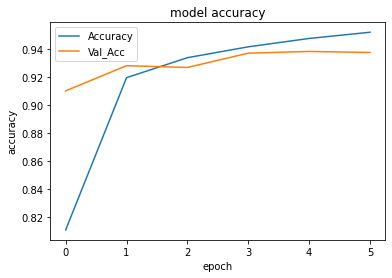

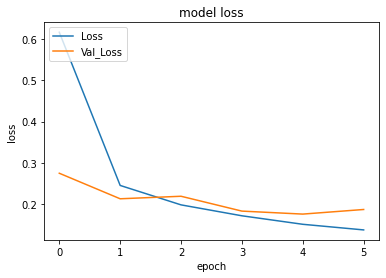

In [9]:
plt.plot(training.history['accuracy']) 
plt.plot(training.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['Accuracy', 'Val_Acc'], loc='upper left') 
plt.show() 
print("")
plt.plot(training.history['loss']) 
plt.plot(training.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['Loss', 'Val_Loss'], loc='upper left') 
plt.show() 

In [10]:
def evaluate(actual, predictions):
  pre = []
  for i in predictions:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

  fig, ax = plt.subplots(figsize=(26,26))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=string.ascii_lowercase, yticklabels=string.ascii_lowercase).set_title('Confusion Matrix')
  plt.show()

In [11]:
predictions = model.predict(test)

Accuracy: 0.9384615384615385
Precision: 0.9419318055304183
Recall: 0.9384615384615385
F1_score: 0.9379866684330077


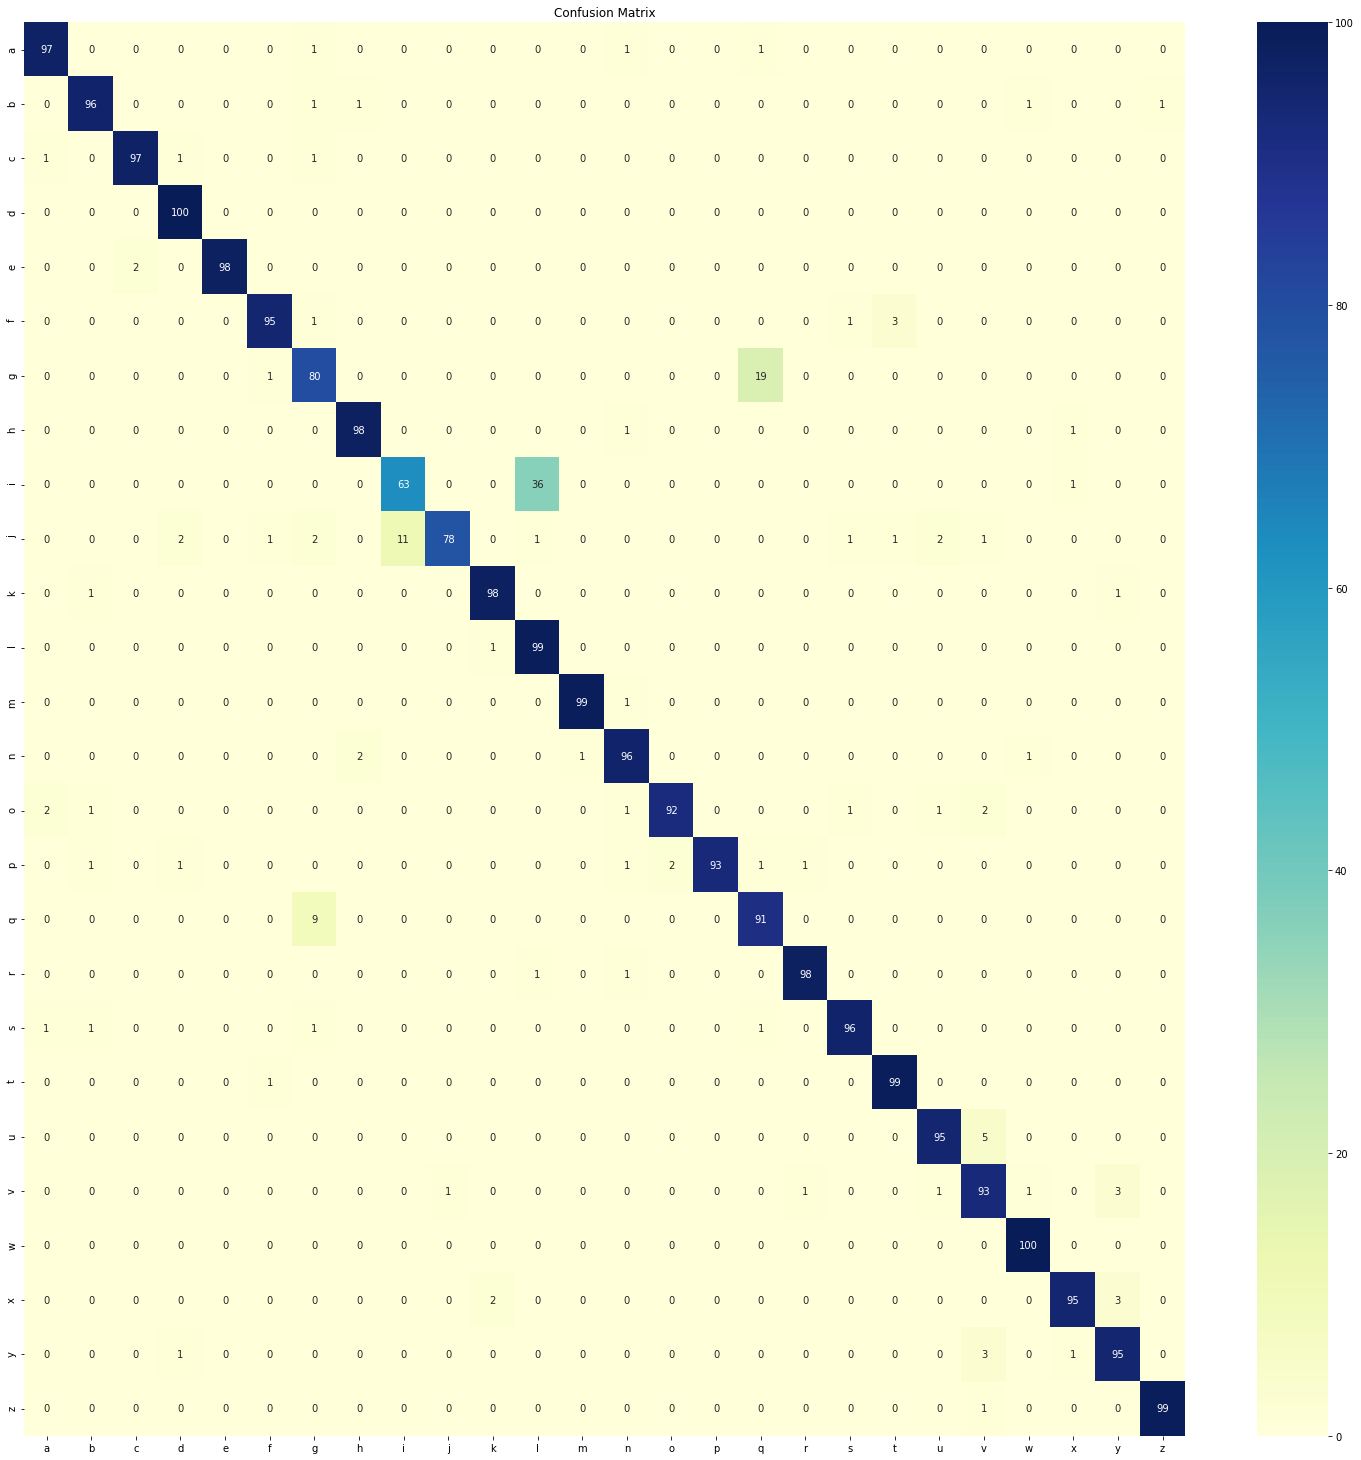

In [12]:
evaluate(test.classes, predictions)